In [2]:
import pandas as pd
from sklearn.cluster import KMeans
import collections
import matplotlib.pyplot as plt
from matplotlib import colors
import pylab as pl
%matplotlib inline

import scipy.stats as stats

import sklearn
import statsmodels.api as sm

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

#special matplotlib argument for improved plots
from matplotlib import rcParams

In [5]:
data = pd.read_csv(r'C:\Users\PB\Downloads\CarsNew.csv')
data = data.loc[data['Year'].isin([2012, 2013])]

In [6]:
kmeans_data = data.fillna(0)
kmeans_data.head(1)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
5,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,31200


In [7]:
kmeans_data.shape

(753, 16)

In [8]:
kmeans_data.keys()

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [9]:
columns = ['Model', 'Engine Fuel Type','Transmission Type', 'Driven_Wheels','Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style']

#remove white spaces in columns names:
kmeans_data.columns = kmeans_data.columns.str.strip()

#drop unwated columns:
kmeans_data.drop(columns, inplace=True, axis=1)
kmeans_data.head()


,Make,Year,Engine HP,Engine Cylinders,highway MPG,city mpg,Popularity,MSRP
5,BMW,2012,230.0,6.0,28,18,3916,31200
6,BMW,2012,300.0,6.0,26,17,3916,44100
7,BMW,2012,300.0,6.0,28,20,3916,39300
8,BMW,2012,230.0,6.0,28,18,3916,36900
9,BMW,2013,230.0,6.0,27,18,3916,37200


In [10]:
kmeans_data.Make = pd.Categorical(kmeans_data.Make)
kmeans_data['Make_code'] = kmeans_data.Make.cat.codes
kmeans_data.head(5)

,Make,Year,Engine HP,Engine Cylinders,highway MPG,city mpg,Popularity,MSRP,Make_code
5,BMW,2012,230.0,6.0,28,18,3916,31200,3
6,BMW,2012,300.0,6.0,26,17,3916,44100,3
7,BMW,2012,300.0,6.0,28,20,3916,39300,3
8,BMW,2012,230.0,6.0,28,18,3916,36900,3
9,BMW,2013,230.0,6.0,27,18,3916,37200,3


In [11]:
kmeans_data.keys()
#kmeans_data.brand.cat.categories

Index(['Make', 'Year', 'Engine HP', 'Engine Cylinders', 'highway MPG',
       'city mpg', 'Popularity', 'MSRP', 'Make_code'],
      dtype='object')

In [12]:
col1 = ['Year', 'Engine HP', 'Engine Cylinders', 'highway MPG',
       'city mpg', 'Popularity', 'MSRP']
selected = kmeans_data[col1]
selected.head(8)

,Year,Engine HP,Engine Cylinders,highway MPG,city mpg,Popularity,MSRP
5,2012,230.0,6.0,28,18,3916,31200
6,2012,300.0,6.0,26,17,3916,44100
7,2012,300.0,6.0,28,20,3916,39300
8,2012,230.0,6.0,28,18,3916,36900
9,2013,230.0,6.0,27,18,3916,37200
10,2013,300.0,6.0,28,20,3916,39600
11,2013,230.0,6.0,28,19,3916,31500
12,2013,300.0,6.0,28,19,3916,44400


0
1
2
3
4
5
6
7
8


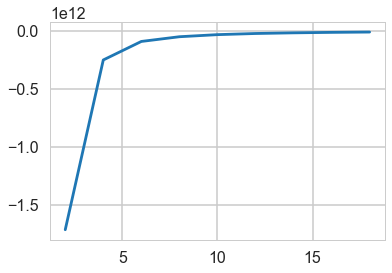

In [13]:
def optimal_clusters(df):
    Nc = range(2, 20, 2)
    data_km = df.values
    kmeans = [KMeans(n_clusters=i) for i in Nc]
    score = []
    for i in range(len(kmeans)):
        print(i)
        score.append(kmeans[i].fit(data_km).score(data_km))
    return Nc, score
#Nc, score = optimal_clusters(df_kmeans)
Nc, score = optimal_clusters(selected)
pl.plot(Nc,score)

In [14]:
    kmeans_model = KMeans(n_clusters=6)
    kmeans_model.fit(selected)
    kmeans_model = kmeans_model.fit(selected)
    print(kmeans_model)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


In [15]:
data_label = kmeans_model.predict(selected)
collections.Counter(data_label)

Counter({0: 520, 4: 165, 1: 20, 3: 42, 5: 5, 2: 1})

In [16]:
selected.head(1)

,Year,Engine HP,Engine Cylinders,highway MPG,city mpg,Popularity,MSRP
5,2012,230.0,6.0,28,18,3916,31200


In [17]:
#Scaling of values
from sklearn import preprocessing
import pandas as pd

x = selected.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
df.head(2)


,0,1,2,3,4,5,6
0,0.0,0.314637,0.5,0.144444,0.065574,0.688551,0.012783
1,0.0,0.410397,0.5,0.122222,0.057377,0.688551,0.022206


In [18]:
selected.head(1)

,Year,Engine HP,Engine Cylinders,highway MPG,city mpg,Popularity,MSRP
5,2012,230.0,6.0,28,18,3916,31200


In [19]:
df.columns = selected.columns
print(df.head())

   Year  Engine HP  Engine Cylinders  highway MPG  city mpg  Popularity  \
0   0.0   0.314637               0.5     0.144444  0.065574    0.688551   
1   0.0   0.410397               0.5     0.122222  0.057377    0.688551   
2   0.0   0.410397               0.5     0.144444  0.081967    0.688551   
3   0.0   0.314637               0.5     0.144444  0.065574    0.688551   
4   1.0   0.314637               0.5     0.133333  0.065574    0.688551   

       MSRP  
0  0.012783  
1  0.022206  
2  0.018700  
3  0.016947  
4  0.017166  


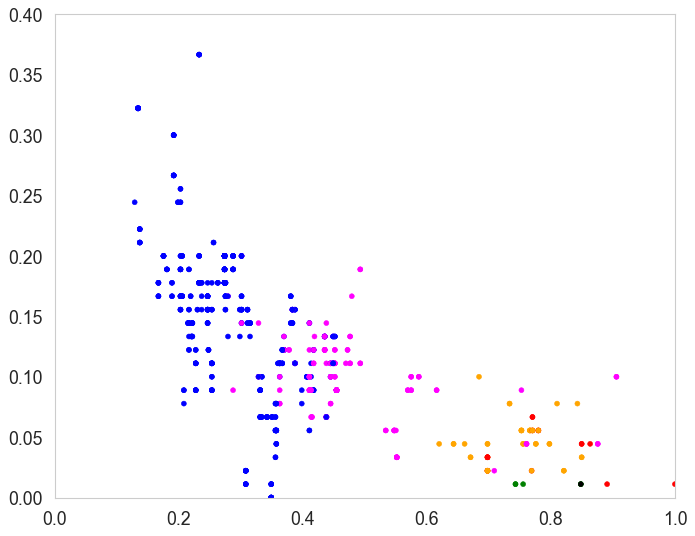

In [20]:
#HP Vs HighwayMPG

from matplotlib.pyplot import figure

figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
color_map=['blue', 'red', 'black', 'orange', 'magenta', 'green']
plt.scatter(df.iloc[:, 1], df.iloc[:, 3], c=data_label, s=20, cmap=colors.ListedColormap(color_map))
#plt.scatter(kmeans_model.cluster_centers_[:,1],kmeans_model.cluster_centers_[:,3],s=100,marker='*',c='red',label='centroids')
plt.ylim(0,0.4)
plt.xlim(0,1)
plt.grid()
plt.show()

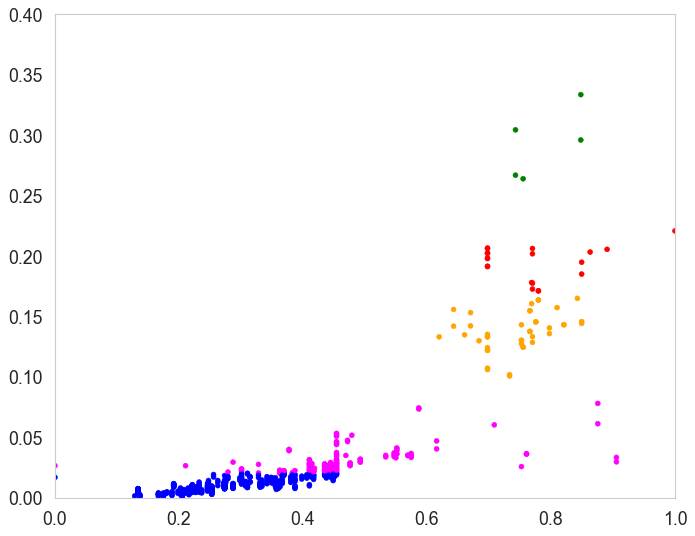

In [21]:
#HP VS CityMPG


from matplotlib.pyplot import figure

figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
color_map=['blue', 'red', 'black', 'orange', 'magenta', 'green']
plt.scatter(df.iloc[:, 1], df.iloc[:, 6], c=data_label, s=20, cmap=colors.ListedColormap(color_map))
#plt.scatter(kmeans_model.cluster_centers_[:,1],kmeans_model.cluster_centers_[:,6],s=250,marker='*',c='red',label='centroids')
plt.ylim(0,0.4)
plt.xlim(0,1)
plt.grid()
plt.show()

In [22]:
print(df.describe())

             Year   Engine HP  Engine Cylinders  highway MPG    city mpg  \
count  753.000000  753.000000        753.000000   753.000000  753.000000   
mean     0.486056    0.363351          0.476428     0.134396    0.082457   
std      0.500138    0.168136          0.185214     0.079798    0.061760   
min      0.000000    0.000000          0.000000     0.000000    0.000000   
25%      0.000000    0.253078          0.333333     0.088889    0.057377   
50%      0.000000    0.310534          0.416667     0.133333    0.073770   
75%      1.000000    0.437756          0.500000     0.177778    0.098361   
max      1.000000    1.000000          1.000000     1.000000    1.000000   

       Popularity        MSRP  
count  753.000000  753.000000  
mean     0.188931    0.029626  
std      0.205453    0.058345  
min      0.000000    0.000000  
25%      0.074061    0.008324  
50%      0.144186    0.012645  
75%      0.245438    0.023228  
max      1.000000    1.000000  


In [23]:
df.head(1)

,Year,Engine HP,Engine Cylinders,highway MPG,city mpg,Popularity,MSRP
0,0.0,0.314637,0.5,0.144444,0.065574,0.688551,0.012783


In [39]:
col2 = ['Engine HP','MSRP']
df2 = df[col2]
df2.head(8)

,Engine HP,MSRP
0,0.314637,0.012783
1,0.410397,0.022206
2,0.410397,0.018700
3,0.314637,0.016947
4,0.314637,0.017166
5,0.410397,0.018919
6,0.314637,0.013002
7,0.410397,0.022425


In [40]:
#Split training and testing data:
#Y = Car Price
#X = All other features

import sklearn.cross_validation
sklearn.model_selection.train_test_split

X = df2.drop('MSRP', axis = 1)
Y = df2['MSRP']


X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X, Y, test_size = 0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)



(504, 1)
(249, 1)
(504,)
(249,)


In [41]:
#Linear Regression:

from matplotlib.pyplot import figure

figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_test)
print(Y_pred)



[ 0.03128151  0.05195469 -0.02540303  0.00794081  0.11130674  0.03561621
  0.14798497  0.00127204  0.03394901  0.04962062 -0.0060636   0.12897898
  0.02661337  0.03394901 -0.02740366  0.05728971  0.00794081 -0.00939799
 -0.00206234  0.05128782  0.12897898  0.12531116 -0.00939799  0.05195469
  0.00794081  0.05195469  0.00293924  0.00293924  0.02961431  0.01694365
  0.00794081 -0.00339609  0.00794081 -0.00206234  0.02627993  0.01460958
 -0.00873111  0.04728655  0.12664491  0.06129097  0.03828372  0.00794081
  0.09130043  0.04962062  0.00127204 -0.02606991  0.03461589  0.00794081
  0.02461274  0.05628939  0.00794081  0.03128151  0.04128466  0.04228498
  0.14798497  0.07996352 -0.01606676  0.1386487   0.00794081  0.01627678
  0.00794081  0.00293924  0.03461589  0.02661337  0.00360611  0.12464428
  0.05195469  0.05195469 -0.00339609 -0.00339609  0.00794081  0.05195469
  0.13131305  0.01460958  0.0112752  -0.05874688  0.05062094  0.04962062
 -0.014733   -0.01606676  0.00794081  0.04962062  0

<Figure size 800x640 with 0 Axes>

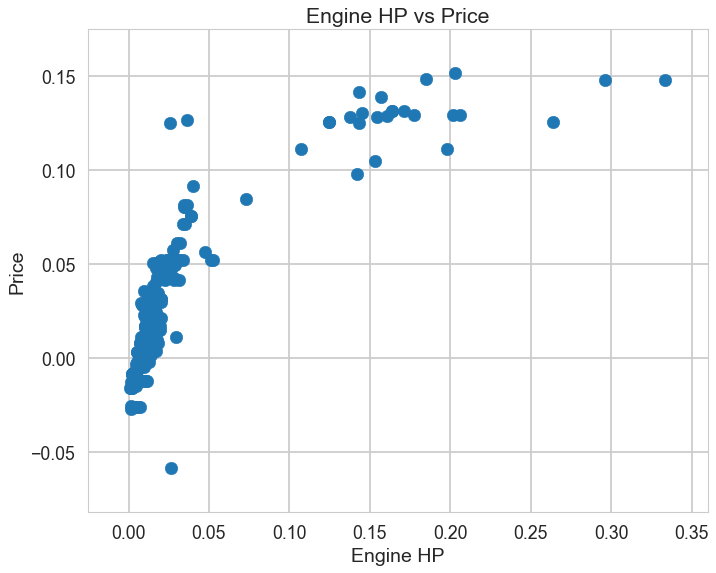

In [42]:
from matplotlib.pyplot import figure

figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

plt.scatter(Y_test, Y_pred)
plt.xlabel("Engine HP")
plt.ylabel("Price")
plt.title("Engine HP vs Price");
# plt.xlim(0,100000)
# plt.ylim(0,100000)


#plt.scatter(Y_test, Y_pred)

C:\Users\PB\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


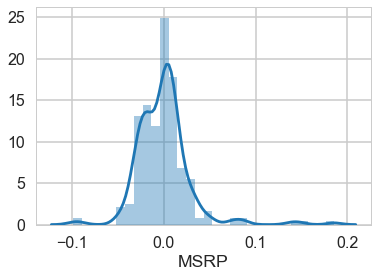

In [43]:
#This plot gives us data for Engine HP Vs Price
sns.distplot((Y_test-Y_pred))

In [46]:
#Mean Absolute Error (MAE) is the mean of the absolute value of the errors:
#1n∑i=1n|yi−ŷ i|

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(Y_test,Y_pred))

# Mean Squared Error (MSE) is the mean of the squared errors:
# 1n∑i=1n(yi−ŷ i)2

print('MSE:', metrics.mean_squared_error(Y_test, Y_pred))

# Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:
# 1n∑i=1n(yi−ŷ i)2

import numpy as np
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

# Comparing these metrics:
# MAE is the easiest to understand, because it's the average error.
# MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
# RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units. 
# All of these are loss functions, because we want to minimize them.

MAE: 56169.11699282303
MSE: 8128815855.220952
RMSE: 90159.94595839636


(504, 1)
(249, 1)
(504,)
(249,)
[73399.82425586 71727.67453255 49989.72812944 31596.08117296
 46645.42868281 31596.08117296 51661.87785276 34940.3806196
 63366.92591597 60022.62646933 33268.23089628 41628.97951286
 36612.53034291 63366.92591597 38284.68006623 60022.62646933
 31596.08117296 34940.3806196  31596.08117296 60022.62646933
 41628.97951286 75071.97397918 34940.3806196  65039.07563928
 31596.08117296 71727.67453255 71727.67453255 65039.07563928
 60022.62646933 29923.93144965 46645.42868281 34940.3806196
 31596.08117296 31596.08117296 66711.2253626  39956.82978954
 34940.3806196  73399.82425586 73399.82425586 60022.62646933
 44973.27895949 31596.08117296 78416.27342581 60022.62646933
 34940.3806196  63366.92591597 81760.57287244 31596.08117296
 63366.92591597 53334.02757607 31596.08117296 73399.82425586
 81760.57287244 60022.62646933 51661.87785276 55006.17729939
 38284.68006623 48317.57840612 31596.08117296 66711.2253626
 31596.08117296 71727.67453255 81760.57287244 36612.5303

<Figure size 800x640 with 0 Axes>

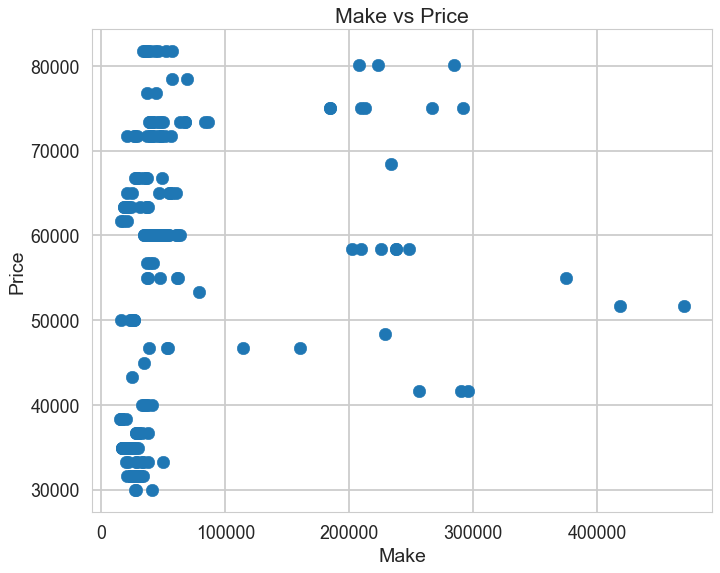

In [45]:
# col3 = ['Make_code','MSRP']
# df3 = kmeans_data[col3]

# import sklearn.cross_validation
# sklearn.model_selection.train_test_split

# X = df3.drop('MSRP', axis = 1)
# Y = df3['MSRP']


# X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X, Y, test_size = 0.33, random_state = 5)
# print(X_train.shape)
# print(X_test.shape)
# print(Y_train.shape)
# print(Y_test.shape)

# from matplotlib.pyplot import figure

# figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
# from sklearn.linear_model import LinearRegression

# lm = LinearRegression()
# lm.fit(X_train, Y_train)

# Y_pred = lm.predict(X_test)
# print(Y_pred)

# from matplotlib.pyplot import figure

# figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

# plt.scatter(Y_test, Y_pred)
# plt.xlabel("Make")
# plt.ylabel("Price")
# plt.title("Make vs Price");

(504, 1)
(249, 1)
(504,)
(249,)
[  57464.60706601   69282.94018054   22009.60772243   37767.38520847
   88980.16203809   61404.05143752   96859.05078111   45646.27395149
   41706.82957998   73222.38455205   57464.60706601   77161.82892356
   77161.82892356   49585.718323     14130.71897941   61404.05143752
   37767.38520847   41706.82957998  -29203.16910719   65343.49580903
   77161.82892356   85040.71766658   41706.82957998   69282.94018054
   33827.94083696   69282.94018054   65343.49580903   61404.05143752
   65343.49580903   45646.27395149   29888.49646545   57464.60706601
   29888.49646545  -29203.16910719  100798.49515262   49585.718323
   41706.82957998   53525.16269451   85040.71766658   33827.94083696
   69282.94018054   29888.49646545   69282.94018054   65343.49580903
   45646.27395149  -13445.39162115   49585.718323     29888.49646545
   77161.82892356   57464.60706601   29888.49646545   57464.60706601
   69282.94018054   77161.82892356   96859.05078111   69282.94018054
   2

<Figure size 800x640 with 0 Axes>

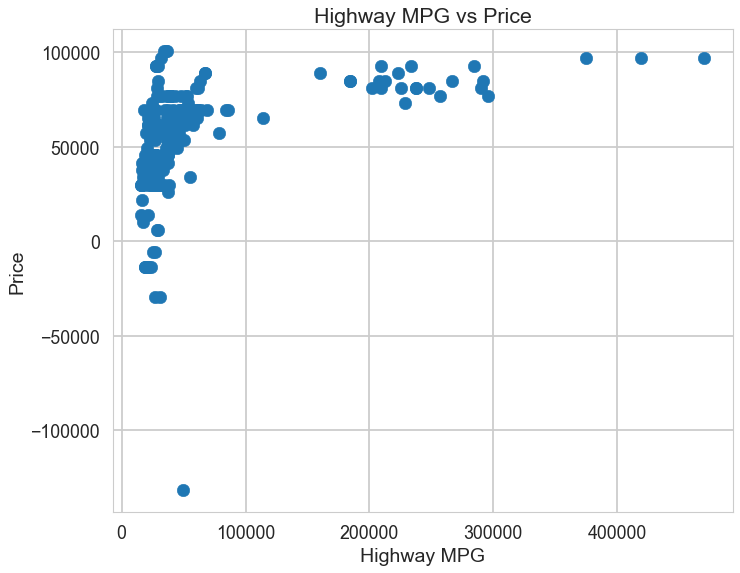

In [37]:
# col4 = ['highway MPG','MSRP']
# df4 = kmeans_data[col4]
# df4.head(8)

# import sklearn.cross_validation
# sklearn.model_selection.train_test_split

# X = df4.drop('MSRP', axis = 1)
# Y = df4['MSRP']


# X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X, Y, test_size = 0.33, random_state = 5)
# print(X_train.shape)
# print(X_test.shape)
# print(Y_train.shape)
# print(Y_test.shape)

# from matplotlib.pyplot import figure

# figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
# from sklearn.linear_model import LinearRegression

# lm = LinearRegression()
# lm.fit(X_train, Y_train)

# Y_pred = lm.predict(X_test)
# print(Y_pred)

# from matplotlib.pyplot import figure

# figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

# plt.scatter(Y_test, Y_pred)
# plt.xlabel("Highway MPG")
# plt.ylabel("Price")
# plt.title("Highway MPG vs Price");